# **Log Transform**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()

In [97]:
df_age = si.fit_transform(df['Age'].array.reshape(-1, 1))

In [4]:
df2 = df
df2.drop(columns=['Age'])

,Survived,Fare
0,0,7.2500
1,1,71.2833
2,1,7.9250
3,1,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,1,30.0000
888,0,23.4500
889,1,30.0000


In [99]:
df_nparray = df2.values

In [100]:
type(df_age)

numpy.ndarray

In [101]:
df_transformed = np.concatenate((df_age, df_nparray), axis=1)

In [102]:
df_transformed_dataframe = pd.DataFrame(df_transformed)

In [103]:
df_transformed_dataframe.rename(columns={0: 'Age', 1: 'Survived', 2:'Fare'})

,Age,Survived,Fare,3
0,22.000000,0.0,22.0,7.2500
1,38.000000,1.0,38.0,71.2833
2,26.000000,1.0,26.0,7.9250
3,35.000000,1.0,35.0,53.1000
4,35.000000,0.0,35.0,8.0500
...,...,...,...,...
886,27.000000,0.0,27.0,13.0000
887,19.000000,1.0,19.0,30.0000
888,29.699118,0.0,NaN,23.4500
889,26.000000,1.0,26.0,30.0000


# Doing the same thing using pandas fillna

In [104]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [105]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [106]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Age QQ Plot')

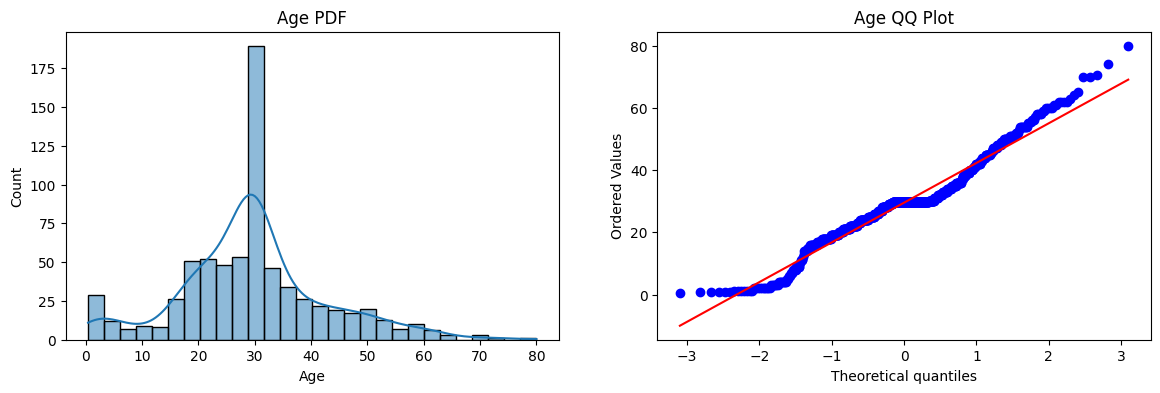

In [108]:
plt.figure(figsize= (14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')


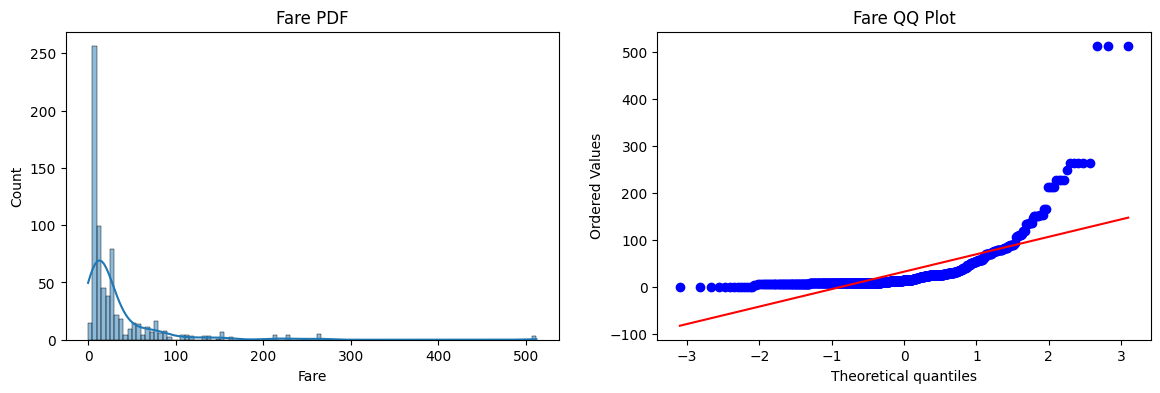

In [109]:
 plt.figure(figsize= (14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [110]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [111]:
clf.fit(x_train,y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print('Acurracy LR', accuracy_score(y_test,y_pred))
print('Accuracy DT', accuracy_score(y_test, y_pred1))

Acurracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [112]:
trf = FunctionTransformer(func=np.log1p)

In [113]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [114]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
    
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [115]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv = 10)))
print('DT', np.mean(cross_val_score(clf2, x_transformed, y, scoring='accuracy', cv = 10)))

LR 0.678027465667915
DT 0.6543695380774032


Text(0.5, 1.0, 'Fare After Log')

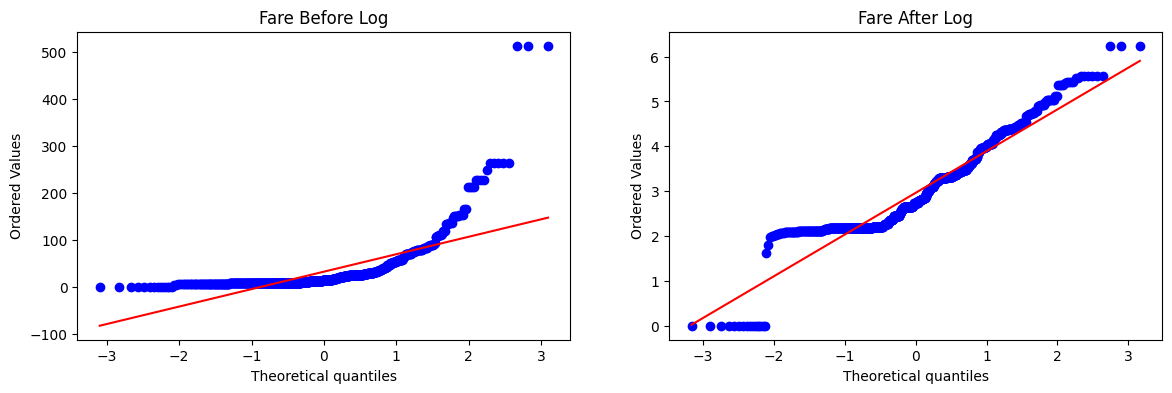

In [116]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist = "norm", plot = plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_transformed['Fare'], dist = "norm", plot = plt)
plt.title('Fare After Log')

Text(0.5, 1.0, 'Age After Log')

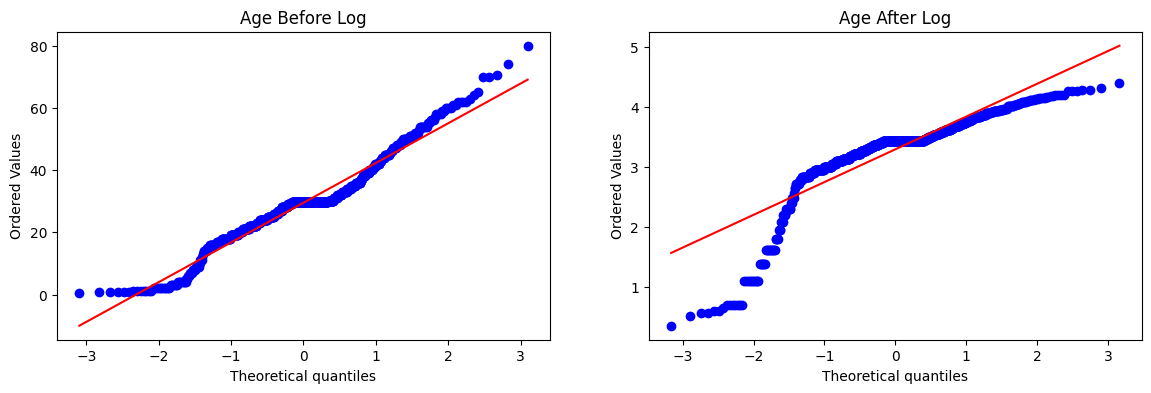

In [117]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist = "norm", plot = plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_transformed['Age'], dist = "norm", plot = plt)
plt.title('Age After Log')

# Only transforming the Fare column not the Age column 

In [118]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [120]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6536312849162011


In [121]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6588389513108615


# **Reciprocal, Square and Sqaure Root Transformation**

**Creating a function that will transform our data according to our function**

In [133]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('Own_Func',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

**passing our own functions to make that transformation**

Accuracy 0.6195131086142323


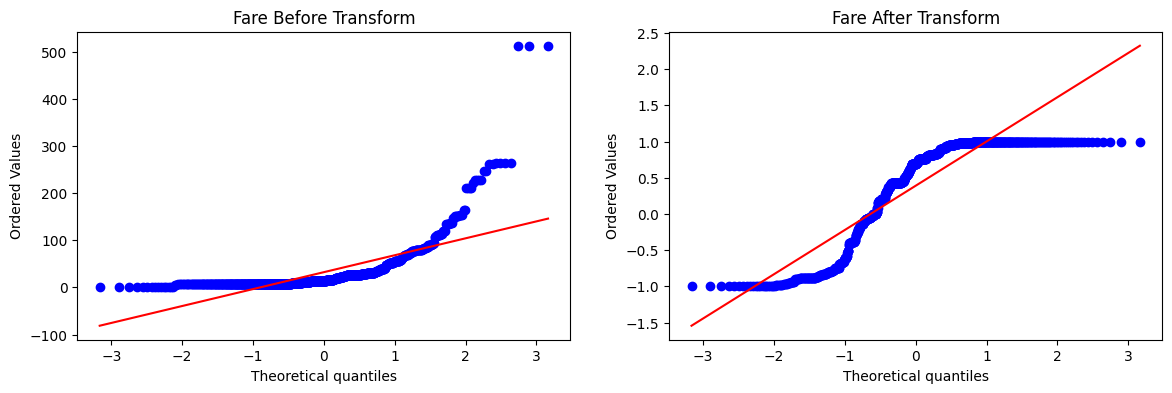

In [134]:
apply_transform(np.sin)